# Домашнее задание 2
## Анализ данных в Python (Социология)
### Темы: предобработка данных для модели, линейная регрессия, регуляризация, оптимизация гиперпараметров, классификация и логистическая регрессия, SGD

**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Если вопрос задается конкретно, то предполагается, что вы дадите комментарии. Не забывайте комментировать код, чтобы было понятно, что вы делаете.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

⚠️ Данное домашнее задание является облегченной версией домашнего задания, которое дается на курсе [Машинное обучение](https://github.com/Murcha1990/ML_AI24) на программе "Искусственный интеллект". Права на изменение и применение получены. Исходник домашнего задания (base и pro) сочетает самые разные прикладные стороны обучения моделей и рекомендуется каждому к изучению.

Всего можно набрать 24,5 балла. В пересчете на 10 балльную систему - это 10 баллов.

**Дедлайн:** до 09:00 (утра) 08.12.2025

**Формат сдачи:** файл ipynb, название файла должно быть в виде: Фамилия_БСЦ_Группа_HW2.ipynb. За неправильно названный файл полагается штраф. Сдача ДЗ ассистенту в личку Telegram: @snovasash

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Чтоб рандомные штуки выпадали не рандомно. Фиксированный сид позволяет выдать точно такой же ответ каждый раз, чтоб легче проходила проверка

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков
- Визуализации признаков и их анализ


## **Простейший EDA и обработка признаков (4.5 балла)**

In [171]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (1.65 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


In [172]:
# your code here
print(df_train.sample(10, random_state=42)) #тут тоже зафиксировала сид, чтоб одинаковое вывело
print(df_test.head(),df_test.tail())
print(df_train.isna().sum(), df_test.isna().sum())
#для тренировочной и тестовой в одинаковых колонках есть пропуски: mileage, engine, max_power, torque, seats
print(df_train.duplicated().sum()) #985 строчек-дубликатов
print(df_test.duplicated().sum()) #62 явных дубликата

                                        name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   


### **Задание 2 (0.75 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [173]:
# your code here
df_train['mileage']=df_train['mileage'].str.split(' ').str[0].astype(float)
df_test['mileage']=df_test['mileage'].str.split(' ').str[0].astype(float)

df_train['engine']=df_train['engine'].str.split(' ').str[0].astype(float)
df_test['engine']=df_test['engine'].str.split(' ').str[0].astype(float)

df_train['max_power']=df_train['max_power'].str.split(' ').str[0].replace('', np.nan).astype(float)
df_test['max_power']=df_test['max_power'].str.split(' ').str[0].replace('', np.nan).astype(float)
#тут для всех трех переменных в обоих датасетах одна процедура: строки разделила по пробелу, взяла первый элемент и сделала числом с плавающей точкой
#только для max_power пришлось дополнительно заменить пустые строки на пропуски (видимо там такие оказались, тк ошибку выдавало)

df_train.drop('torque',axis=1,inplace=True)
df_test.drop('torque',axis=1,inplace=True)
#удалила столбец torque, inplace=True чтоб изменения сохранились в исходном датафрейме



В предыдущем задании мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [174]:
# your code here
medians = df_train.median(numeric_only=True)
df_train.fillna(medians, inplace=True)
df_test.fillna(medians, inplace=True)
#заполнила пропуски медианами, у меня одинаковые колонки с пропусками, поэтому таким образом я заполнила все пропуски по колонкам медианами из тренировочной базы

print(df_train.isna().sum(),df_test.isna().sum()) #пропусков нет

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64 name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


### **Задание 3 (0.3 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [175]:
# your code here
df_train['engine']=df_train['engine'].astype(int)
df_test['engine']=df_test['engine'].astype(int)

df_train['seats']=df_train['seats'].astype(int)
df_test['seats']=df_test['seats'].astype(int)
#сделала целыми числами, тут уже inplace не предусмотрен, поэтому присвоила в те же колонки

df_train.dtypes
df_test.dtypes
#все норм

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object
mileage,float64
engine,int64


### **Задание 4 (1.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [176]:
# your code here
#целевая переменная - selling_price
duplicates=df_train.columns.drop('selling_price')
df_duplicates = df_train.duplicated(subset=duplicates, keep=False) #нахожу все дубликаты по всем колонкам, кроме цены
print(df_train[df_duplicates]) #вывожу их
print(df_duplicates.sum()) #1799 дубликатов

df_train = df_train.drop_duplicates(subset=duplicates, keep='first') #удаляю дубликаты, оставляю первые строки-дубликаты из них
df_train = df_train.reset_index(drop=True) #обновляю индексы
print(df_train.shape)


                                          name  year  selling_price  \
22                     Maruti Baleno Delta 1.2  2016         575000   
26                 Maruti Omni E MPI STD BS IV  2018         254999   
27             Maruti Vitara Brezza LDi Option  2017         670000   
28                          Fiat Palio 1.2 ELX  2003          70000   
29                   Maruti Omni 8 Seater BSIV  2012         150000   
...                                        ...   ...            ...   
6981  Ford Freestyle Titanium Plus Diesel BSIV  2018         750000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner  mileage  \
22        45000  Petrol  Individual       Manual   First Owner    21.40 

In [177]:
# Проверка того, что все сделали правильно

assert df_train.shape == (5840, 12), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'
#хз, ничего не сработало, но я проверила, все норм

### **Задание 5 (0.3 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [178]:
# your code here
print(df_train.describe(),df_test.describe()) #по умолчанию тут берутся только числовые столбцы

print(df_train.describe(include=['object']),df_test.describe(include=['object'])) #а тут нужно уточнять, что категориальные


              year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.428611  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.986026   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.300000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.910782     5.426712  
std      31.639585     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000   

## **Визуализации (3 балла)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (1.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

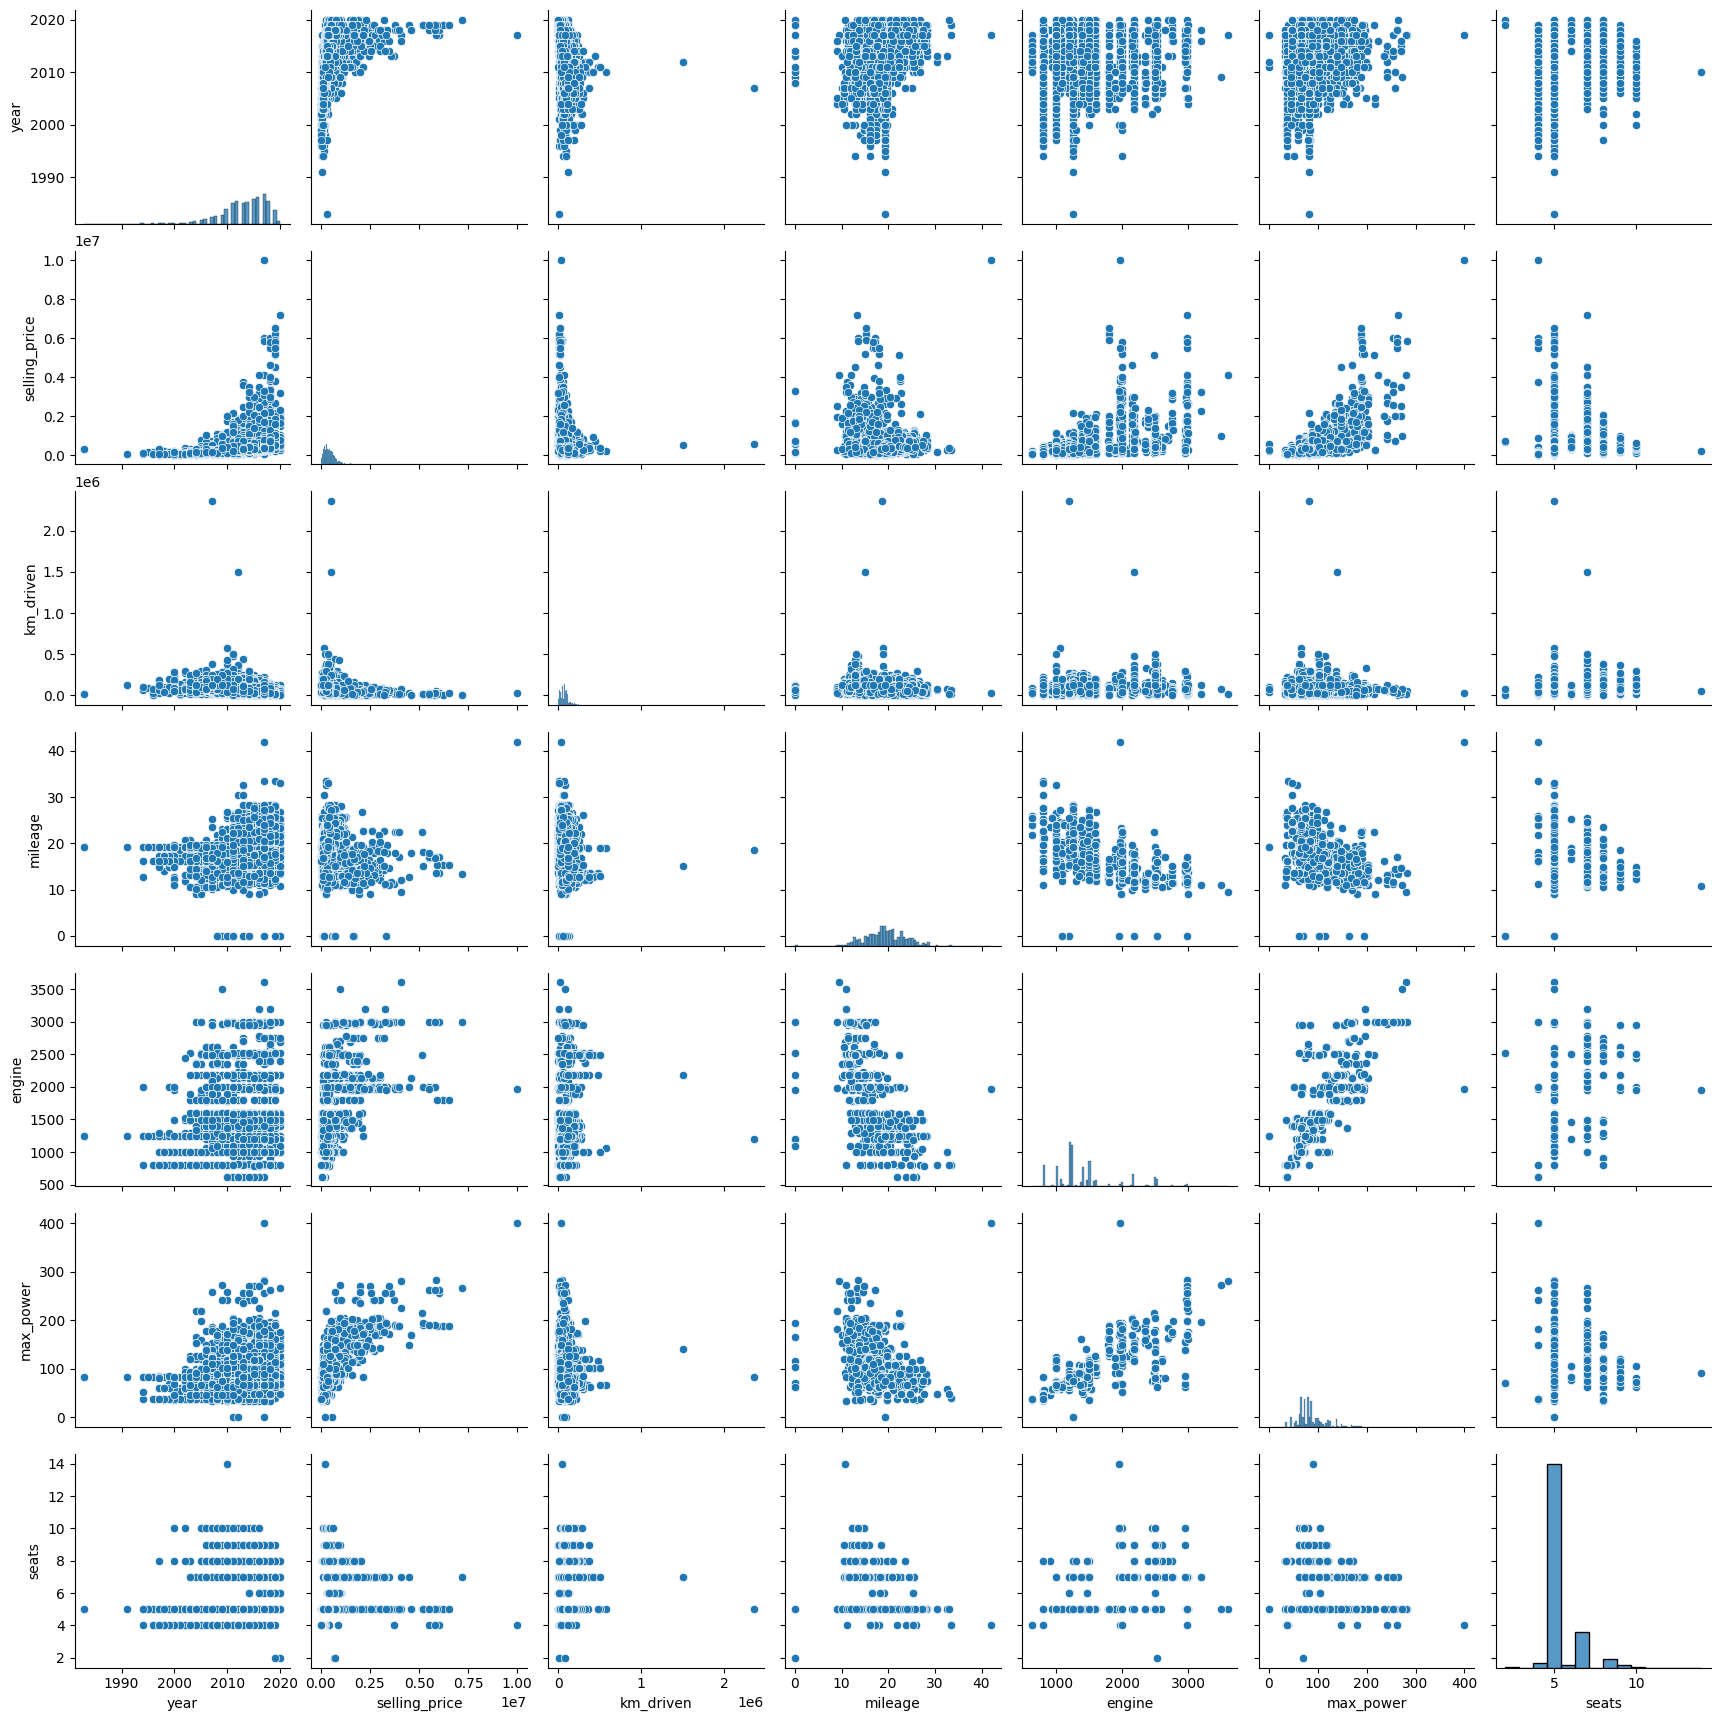

In [179]:
# your code here
sns.pairplot(df_train)
#ну в целом, есть небольшая связь между selling_price и max_power, engine и year, но не прям сильная. Тк можно увидеть небольшую вытянутость
#вдоль воображаемой прямой, но все равно высокий разброс точек и не вырисовывается четкая линейная зависимость. Насчет других переменных,
#то я бы сказала, что там связь если есть, то минимальная
#если говорить о корреляции между признаками, то можно увидеть, что max_power и engine имеют довольно сильную корреляцию между собой, положительную,
#а еще есть умеренные корреляции между max_power и mileage и engine и mileage, они отрицательные

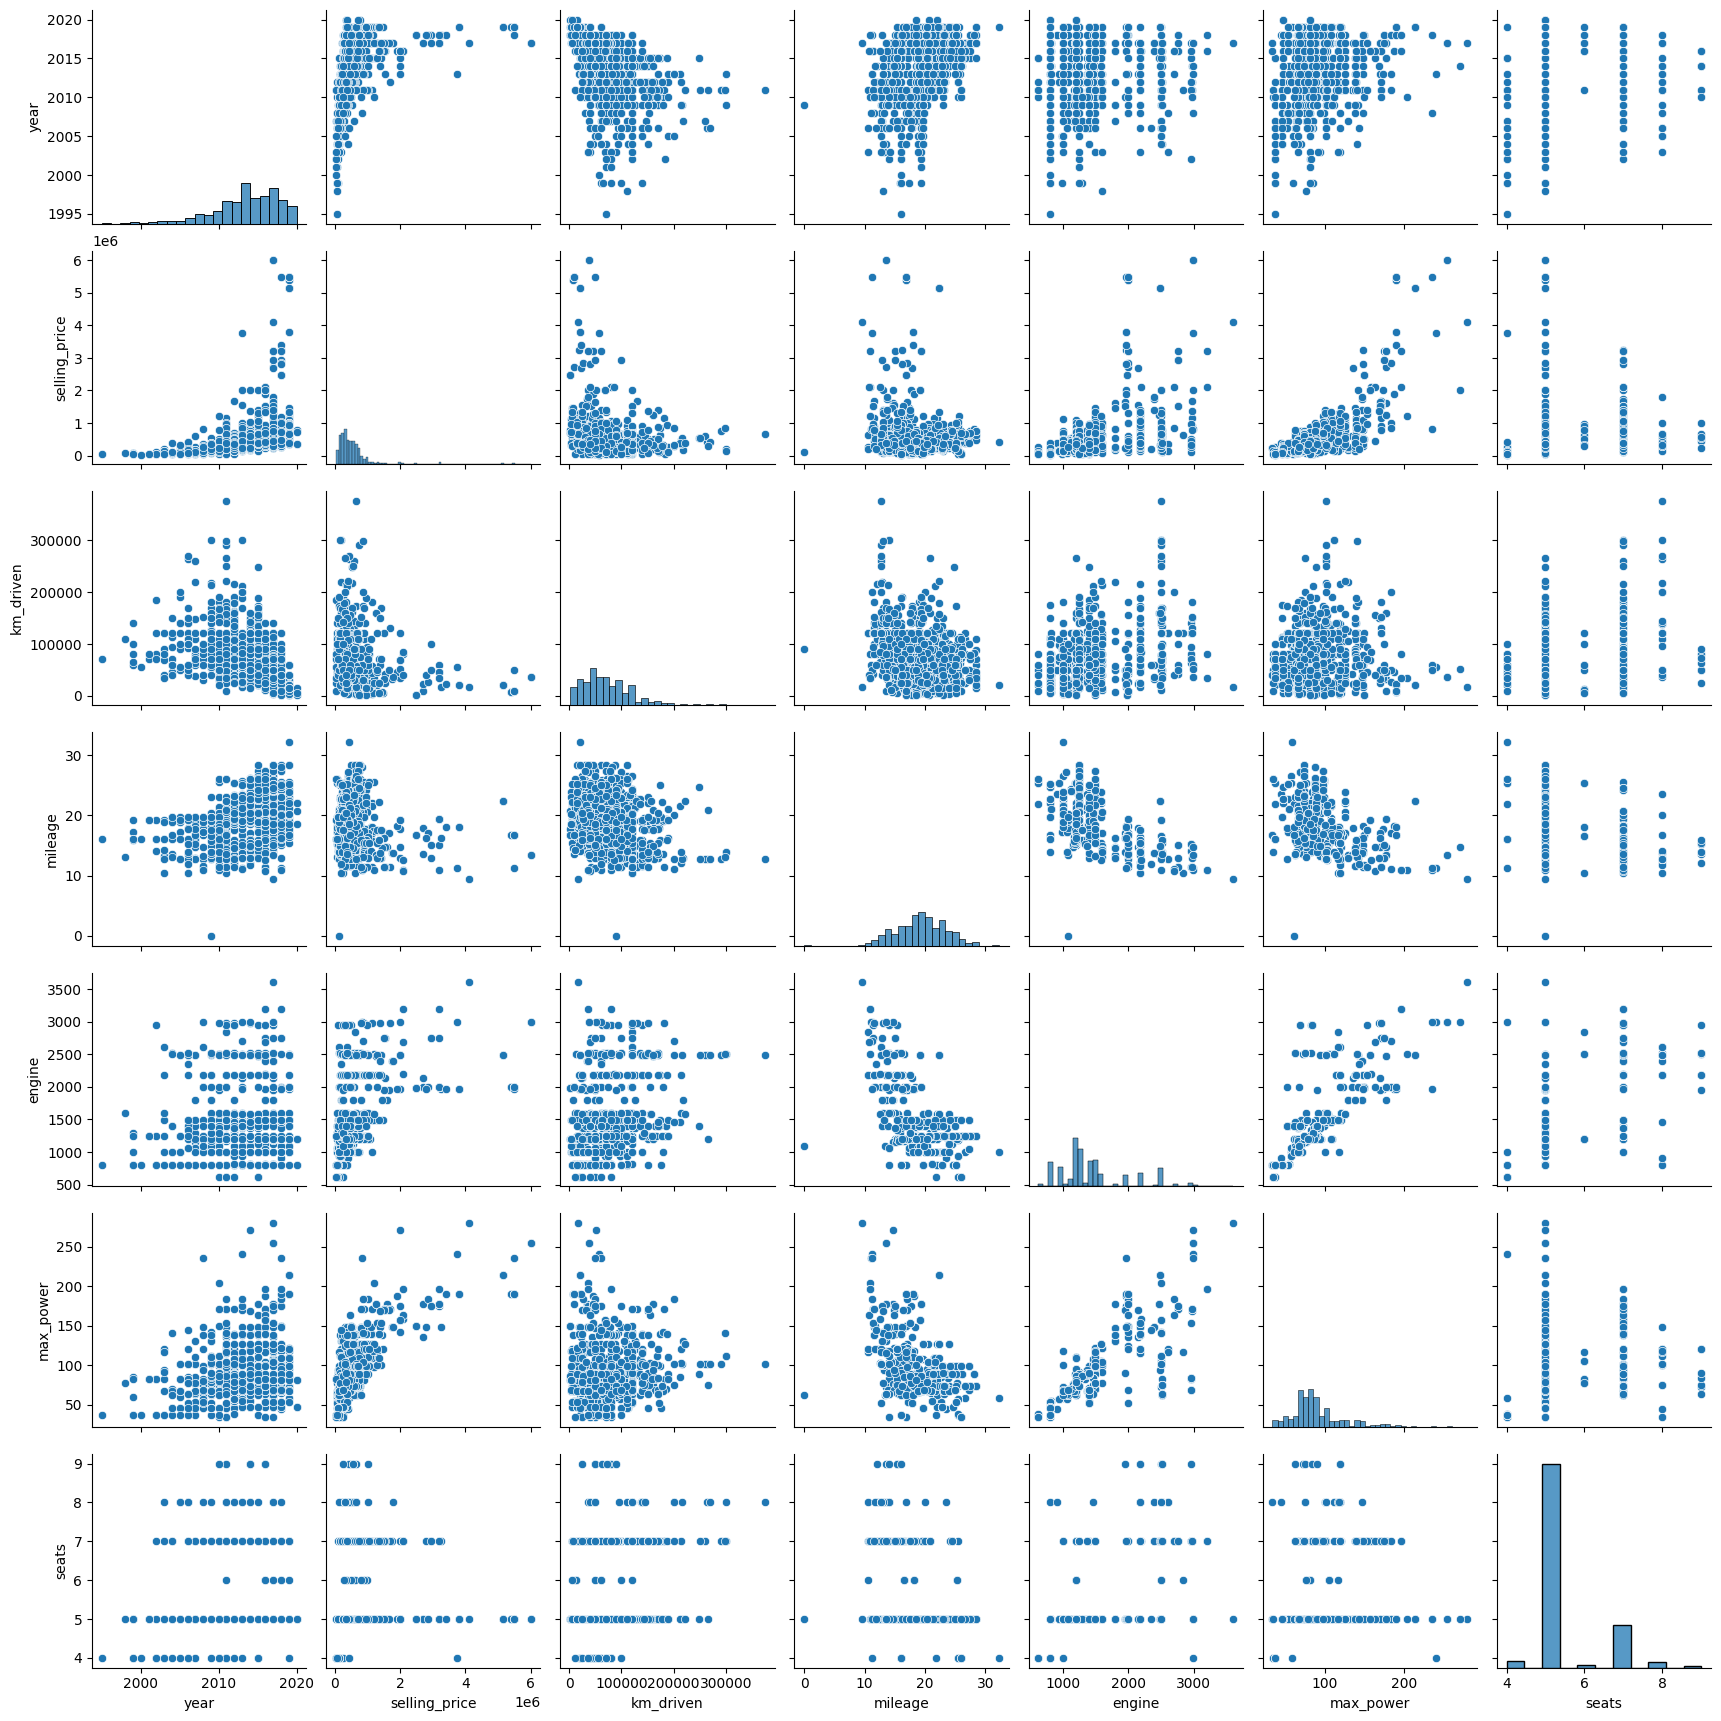

In [180]:
# your code here
sns.pairplot(df_test)

Я бы сказала, что распределение признаков визуально похоже. Они и по форме похожи, и сохранились описанные в трейне связи и их направления. То есть в целом выборки однородные, разделение хорошее

### **Задание 7 (1.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [181]:
# your code here
corr=df_train.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
corr
#отобрала только колонки с числами и посчитала корреляцию

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.342172,0.002819,0.156648,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.104458,0.447672,0.692754,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.182245,0.229766,0.024630,0.192328
mileage,0.342172,-0.104458,-0.182245,1.000000,-0.572677,-0.373271,-0.450810
engine,0.002819,0.447672,0.229766,-0.572677,1.000000,0.681082,0.652172
max_power,0.156648,0.692754,0.024630,-0.373271,0.681082,1.000000,0.244060
seats,0.041178,0.149953,0.192328,-0.450810,0.652172,0.244060,1.000000


<Axes: >

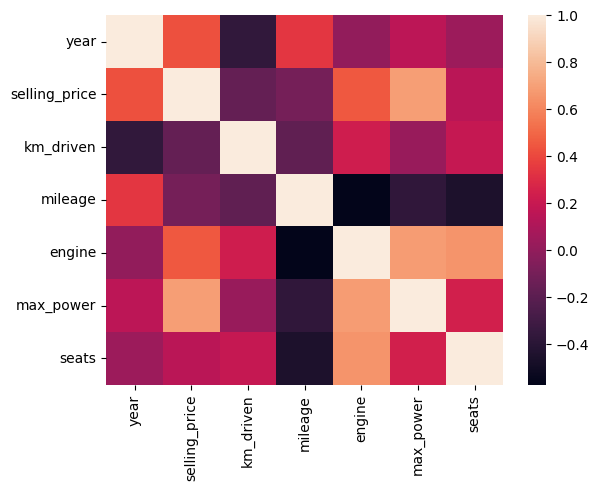

In [182]:
sns.heatmap(corr)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

1. наименее скоррелированные признаки - engine и year (корр = 0.002819)
2. довольно сильная положительная связь наблюдается между:
engine и max_power (0.681082)
engine и seats (0.652172)
Я не смотрю тут на связи с selling_price, тк вопрос связь между признаками
3. между years и km_driven есть умеренно-слабая отрицательная связь (-0.368966), поэтому в целом можно утверждать, что так может быть

# **Часть 2 | Модель только на вещественных признаках (6.25 балла)**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.


### **Задание 8 (0.25 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [183]:
df_train.columns
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5


In [184]:
#я не делала прям копию всего датафрейма, я сразу распределила на X и y, просто я честно говоря не поняла в чем смысл делать копию
y_train_reg = df_train['selling_price'].dropna()
X_train_reg = df_train[['year', 'km_driven','mileage','engine','max_power','seats']].dropna()
#тут в y_train пошла целевая переменная, а в X_train - вещественные признаки

In [185]:
X_train_reg.shape

(5840, 6)

In [186]:
%%time

for i in range(1, 100000):
    i

CPU times: user 7.96 ms, sys: 0 ns, total: 7.96 ms
Wall time: 9.05 ms


In [187]:
assert X_train_reg.shape == (5840, 6), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'
#короче так понима, у меня все ок

In [188]:
y_test_reg = df_test['selling_price'].dropna()
X_test_reg = df_test[['year', 'km_driven','mileage','engine','max_power','seats']].dropna()
X_test_reg.shape

(1000, 6)

In [189]:
assert X_test_reg.shape == (1000, 6), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'
#все сошлось

### **Задание 9 (1 балл)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [190]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here

lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)
#обучила модель на трейне
pred_train_reg = lr.predict(X_train_reg)
pred_test_reg = lr.predict(X_test_reg)
#сделала предсказания на трейне и тесте
r2_train_reg=r2_score(y_train_reg, pred_train_reg)
r2_test_reg=r2_score(y_test_reg, pred_test_reg)
#посчитала р квадрат
mse_train_reg=MSE(y_train_reg, pred_train_reg)
mse_test_reg=MSE(y_test_reg, pred_test_reg)
#посчитала мсе
print(f'R квадрат для трейна: {r2_train_reg}, для теста: {r2_test_reg}')
print(f'MSE для трейна: {mse_train_reg}, для теста: {mse_test_reg}')

#ну, переобученности нет, так как р квадрат на тесте каплю выше, чем на трейне, то есть модель и для трейна, и для теста предсказывает
#около 59% вариации значений цены. В социологии сказали бы, что хорошо, но для ml это мало
#мсе на тесте выше, чем на трейне, то есть модель сильнее ошибается на тестовых данных, нужно улучшать модель

R квадрат для трейна: 0.5922629595849875, для теста: 0.5941441219017134
MSE для трейна: 116873067751.52162, для теста: 233297548204.61063


### **Задание 10 (0.75 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [191]:
from sklearn.preprocessing import StandardScaler

# your code here

scaler_reg = StandardScaler()
scaler_reg.fit(X_train_reg)
#обучила стандартизатор на трейне
X_train_scaler = scaler_reg.transform(X_train_reg)
X_test_scaler = scaler_reg.transform(X_test_reg)
#применила стандартизацию к данным

#дальше заново обучаю и строю модель, уже на стандартизированных данных
lr_scaler = LinearRegression()
lr_scaler.fit(X_train_scaler, y_train_reg)
#обучила модель на стандартизированном трейне
pred_train_scaler = lr_scaler.predict(X_train_scaler)
pred_test_scaler = lr_scaler.predict(X_test_scaler)
#сделала предсказания на трейне и тесте
r2_train_scaler=r2_score(y_train_reg, pred_train_scaler)
r2_test_scaler=r2_score(y_test_reg, pred_test_scaler)
#посчитала р квадрат
mse_train_scaler=MSE(y_train_reg, pred_train_scaler)
mse_test_scaler=MSE(y_test_reg, pred_test_scaler)
#посчитала мсе
print(f'R квадрат для трейна: {r2_train_scaler}, для теста: {r2_test_scaler}')
print(f'MSE для трейна: {mse_train_scaler}, для теста: {mse_test_scaler}')
#ну, здесь метрики практически не изменились, только уже в районе 10+ числа после запятой, то есть стандартизация
#особо никакого результата не принесла, что ожидаемо, тк линрег не чувствительна к масштабу признаков

R квадрат для трейна: 0.5922629595849875, для теста: 0.5941441219017262
MSE для трейна: 116873067751.52162, для теста: 233297548204.6033


### **Задание 11 (0.5 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [192]:
# your code here

print(lr_scaler.coef_)
#список всех коэффициентов
maxB = np.argmax(np.abs(lr_scaler.coef_))
#тут я привела все коэффициенты к модулю, тк нужно найти самый большой по величине, дальше я присваиваю переменной maxB индекс этого признака
print(f'Самый важный признак: {X_train_reg.columns[maxB]}, его значение коэффициента В равно {lr_scaler.coef_[maxB]}')
#тут я по индексу вывела название признака и значение его коэффициента


[152843.26235772 -44148.04751104  28781.08659475  61176.85714999
 322779.70323584 -23220.5702262 ]
Самый важный признак: max_power, его значение коэффициента В равно 322779.7032358398


### **Задание 12 (1.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [193]:
from sklearn.linear_model import Lasso

# your code here
lasso=Lasso()
lasso.fit(X_train_scaler, y_train_reg)
#обучила лассо на стандартизированных данных
pred_train_lasso = lasso.predict(X_train_scaler)
pred_test_lasso = lasso.predict(X_test_scaler)
#сделала предсказания на трейне и тесте
r2_train_lasso=r2_score(y_train_reg, pred_train_lasso)
r2_test_lasso=r2_score(y_test_reg, pred_test_lasso)
#посчитала р квадрат
mse_train_lasso=MSE(y_train_reg, pred_train_lasso)
mse_test_lasso=MSE(y_test_reg, pred_test_lasso)
#посчитала мсе
print(f'R квадрат для трейна: {r2_train_lasso}, для теста: {r2_test_lasso}')
print(f'MSE для трейна: {mse_train_lasso}, для теста: {mse_test_lasso}')
#ну, здесь опять же метрики практически не изменились, модель не переобучена, но каких-то значимых улучшений нет
#р квадрат все так же 59%, мсе на тесте выше, то есть модель сильнее ошибается на тестовых данных, нужно искать другие способы как улучшить модель

R квадрат для трейна: 0.5922629595497046, для теста: 0.5941429546560312
MSE для трейна: 116873067761.63504, для теста: 233298219170.76022


In [194]:
# your code here
print(lasso.coef_)
#список всех коэффициентов
#здесь видно, что никакие коэффициенты не обнулились, значит все признаки остались в модели
#по сути, это значит, что лассо не нашла в данных особо сильной мультиколлинеарности между признаками, чтобы обнулить какой-то из них
#плюс, у меня и так мало признаков, всего 6, поэтому обнулять особо нечего
#штраф альфа по умолчанию стоит 1, в теории, если его увеличить, то какие-то признаки могут обнулиться

[152843.08385345 -44146.91853785  28779.20408499  61172.02578008
 322780.58619708 -23217.69327311]


### **Задание 13 Финальный рывок (2.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [195]:
from sklearn.model_selection import GridSearchCV

# your code here
params={'alpha':[0.1,1,5,10,50,100]}
lasso_grid=GridSearchCV(Lasso(), param_grid=params,cv=10)
lasso_grid.fit(X_train_scaler, y_train_reg)
#обучила гридсерч лассо на стандартизированных данных
#гридсерчу пришлось обучать 60 моделей (6 значений альфа по 10 фолдов)
lasso_grid.best_params_
#лучшим значением штрафа альфа оказалось 100 - то естьэто коэффициент регуляризации у лучшей из перебранных моделей

{'alpha': 100}

In [196]:
# your code here
lasso_grid.best_estimator_.coef_
#тут я вывела коэффициенты лучшей модели из гридсерча, здесь видно, что они не обнулились. Более того, они в целом и не особо изменились
#по сути, для стандартизированных данных, с учетом того что у меня мало признаков, альфа=100 это мало для того, чтоб коэффициенты обнулились

array([152819.5529717 , -44037.83207098,  28601.04061998,  60701.69450513,
       322866.99092623, -22933.37348536])

In [197]:
pred_train_lasso_grid = lasso_grid.predict(X_train_scaler)
pred_test_lasso_grid = lasso_grid.predict(X_test_scaler)
#сделала предсказания на трейне и тесте
r2_train_lasso_grid=r2_score(y_train_reg, pred_train_lasso_grid)
r2_test_lasso_grid=r2_score(y_test_reg, pred_test_lasso_grid)
#посчитала р квадрат
mse_train_lasso_grid=MSE(y_train_reg, pred_train_lasso_grid)
mse_test_lasso_grid=MSE(y_test_reg, pred_test_lasso_grid)
#посчитала мсе
print(f'R квадрат для трейна: {r2_train_lasso_grid}, для теста: {r2_test_lasso_grid}')
print(f'MSE для трейна: {mse_train_lasso_grid}, для теста: {mse_test_lasso_grid}')
#опять же, мало что изменилось, но как минимум модель все еще без переобученности

R квадрат для трейна: 0.5922626154673558, для теста: 0.5940274205812401
MSE для трейна: 116873166388.82776, для теста: 233364631456.09937


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [198]:
from sklearn.linear_model import ElasticNet

# your code here
grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}
elastic_grid=GridSearchCV(ElasticNet(),param_grid=grid,cv=10)
elastic_grid.fit(X_train_scaler, y_train_reg)
#обучила гридсерч эластик нет на тренировочной выборке
#гридсерчу пришлось обучать 420 моделей (6 альфа * 7 л1_ратио * 10 фолдов)
elastic_grid.best_params_
#у лучшей модели коэффициент регуляризации равен 10, а л1_ратио =0.99

{'alpha': 10, 'l1_ratio': 0.99}

In [199]:
pred_train_elastic_grid = elastic_grid.predict(X_train_scaler)
pred_test_elastic_grid = elastic_grid.predict(X_test_scaler)
#сделала предсказания на трейне и тесте
r2_train_elastic_grid=r2_score(y_train_reg, pred_train_elastic_grid)
r2_test_elastic_grid=r2_score(y_test_reg, pred_test_elastic_grid)
#посчитала р квадрат
mse_train_elastic_grid=MSE(y_train_reg, pred_train_elastic_grid)
mse_test_elastic_grid=MSE(y_test_reg, pred_test_elastic_grid)
#посчитала мсе
print(f'R квадрат для трейна: {r2_train_elastic_grid}, для теста: {r2_test_elastic_grid}')
print(f'MSE для трейна: {mse_train_elastic_grid}, для теста: {mse_test_elastic_grid}')
#здесь видно, что качество предсказания модели упало, при этом, модель еще и переобученной оказалась. Мсе тоже выросло, то есть модель сильнее ошибается

R квадрат для трейна: 0.5883561318507287, для теста: 0.5722217567483188
MSE для трейна: 117992914361.52008, для теста: 245899149701.91507


# **Часть 3| Добавляем категориальные фичи (3.75 балла)**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.


### **Задание 14 (0.5 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
1. Удалить столбец`name`
2. Снова объединить категориальные с вещественными признаками.

In [200]:
df_train.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object
mileage,float64
engine,int64


In [201]:
# your code here
#с учетом того, что у меня остался изначальный датафрейм, я просто опять распределю данные. В у пойдет selling_price, а в Х - все остальные колонки, кроме name
y_train_ridge = df_train['selling_price'].dropna()
X_train_ridge = df_train.drop(['name','selling_price'], axis=1).dropna()
y_test_ridge = df_test['selling_price'].dropna()
X_test_ridge = df_test.drop(['name','selling_price'], axis=1).dropna()

In [202]:
print(X_train_ridge.shape)
print(X_test_ridge.shape)
X_test_ridge.dtypes
#тут я чисто проверила, чтоб все было ок

(5840, 10)
(1000, 10)


,0
year,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object
mileage,float64
engine,int64
max_power,float64
seats,int64


### **Задание 15 (2 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [203]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here
X_train_ridge = pd.get_dummies(X_train_ridge, columns=['fuel','seller_type','transmission', 'owner','seats'], drop_first=True)
X_test_ridge = pd.get_dummies(X_test_ridge, columns=['fuel','seller_type','transmission', 'owner','seats'], drop_first=True)
#сделала даммис для категориальных фичей и выкинула первые столбцы
X_test_ridge = X_test_ridge.reindex(columns=X_train_ridge.columns, fill_value='0')
#здесь я сделала так, чтобы колонки совпадали. То есть, если колонки нет в трейне - то она появится, и там все будет по нулям (ну или false)
#то же самое наоборот - если нет в тесте, но есть в трейне, то тоже появится вся с false



In [204]:
print(X_train_ridge.shape)
print(X_test_ridge.shape)
#кол-во колонок совпало

(5840, 23)
(1000, 23)


### **Задание 16 (1.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [205]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here
#params был задан ранее в лассо
ridge_grid=GridSearchCV(Ridge(),param_grid=params,cv=10,scoring='r2')
ridge_grid.fit(X_train_ridge, y_train_reg)
#обучила гридсерч ридж на тренировочной выборке
ridge_grid.best_params_
#у лучшей модели коэффициент регуляризации альфа равен 5

{'alpha': 5}

In [206]:
ridge=Ridge()
ridge.fit(X_train_ridge, y_train_reg)
#обучила лассо на НЕ стандартизированных данных
pred_train_ridge = ridge.predict(X_train_ridge)
pred_test_ridge = ridge.predict(X_test_ridge)
#сделала предсказания на трейне и тесте
r2_train_ridge=r2_score(y_train_reg, pred_train_ridge)
r2_test_ridge=r2_score(y_test_reg, pred_test_ridge)
#посчитала р квадрат
mse_train_ridge=MSE(y_train_reg, pred_train_ridge)
mse_test_ridge=MSE(y_test_reg, pred_test_ridge)
#посчитала мсе
print(f'R квадрат для трейна: {r2_train_ridge}, для теста: {r2_test_ridge}')
print(f'MSE для трейна: {mse_train_ridge}, для теста: {mse_test_ridge}')
#качество предсказания модели улучшилось, самое хорошоее по сравнению с обычной линрег, лассо и эластик нет. Однако вижу, что модель слегка переобучена, тк
#у нее для трейна р квадрат 67%, а для теста - 63%. Что касательно мсе, то он упал по сравнению с другими моделями. Но в случае предсказывания теста модель все равно чаще ошибается

R квадрат для трейна: 0.6662193609651267, для теста: 0.629943886079392
MSE для трейна: 95674327748.98961, для теста: 212718821470.15875


# **Часть 4 (7 баллов) | Классификация**



In [207]:
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [208]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

### **Задание 13 (2 балла)**
Обучите логистическую регрессию на синтетических данных.

In [209]:
# your code here
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train, y_train)
#обучила на трейне, тут ничего нового нет в плане каких-то команд

LogisticRegression()

На тестовой части посчитайте ROC-AUC, PR-AUC. Самостоятельно изучите, что такое PR-AUC.

Постройте ROC и PR кривые. Проинтерпретируйте результат.

In [210]:
# your code here
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
y_prob = logreg.predict_proba(X_test)[:, 1]
#предсказала вероятности для тестового датасета
roc_auc = roc_auc_score(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)
#посчитала ROC-AUC и PR-AUC


Значение ROC-AUC: 0.9259023377910034


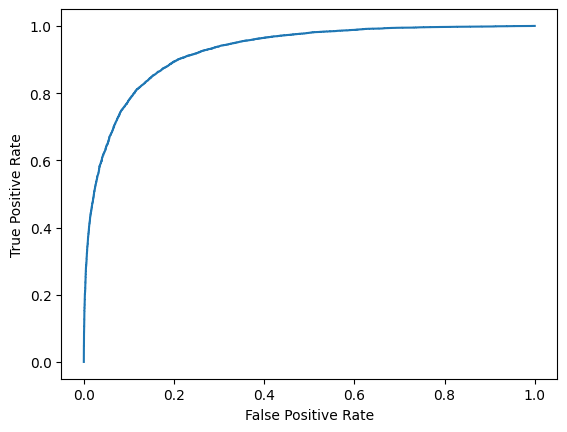

In [211]:
import matplotlib.pyplot as plt

def plot_roc_curve(y_test, y_prob):

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
#создала функцию, которая строит график. Здесь как бы считаются все точки на графике, то есть значения FPR, TPR и соответствующие пороги,
#необходимые для построения кривой
plot_roc_curve(y_test, y_prob)
print(f'Значение ROC-AUC: {roc_auc}')
#построила кривую и вывожу значение ROC-AUC

Значение PR-AUC: 0.9249757664368783


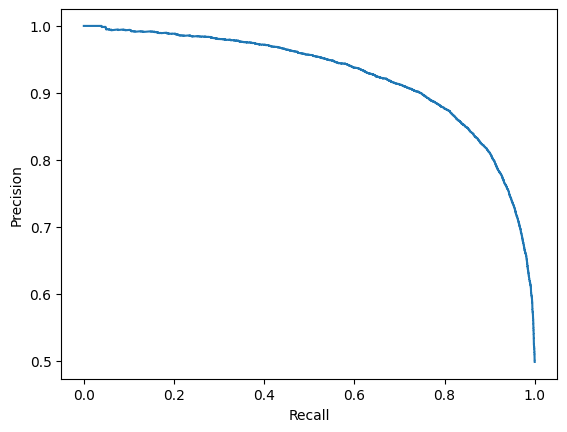

In [212]:
def plot_pr_curve(y_test, y_prob):

    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
#тут по сути то же самое, только иные оси и сама функция по построению кривой
plot_pr_curve(y_test, y_prob)
print(f'Значение PR-AUC: {pr_auc}')
#построила кривую, вывела значение PR-AUC

ROC-кривая показывает, насколько хорошо модель разделяет два класса при разных порогах классификации.Если смотреть на roc-auc (=0.93) и на график, то модель работает хорошо: кривая проходит близко к левому верхнему углу, а значит, при выбоюре любого порога вероятности модель скорее всего правильно классифицирует большинство значений, она уверенно отличает положительный класс от отрицательного
PR-кривая отражает качество выявления положительного класса. Судя по значению pr-auc (=0.92) и графику, то модель практически не ошибается, когда определяет положительный класс (1) и делает это практически без ложных срабатываний. Плюс, она стабильна, а значит хорошо сработает и на несбалансированных данных
Короче, все супер

### **Задание 14 (2 балла)**

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка train). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом для задания мы немного модифицируем датасет. (Датасет в чате ТГ)

In [213]:
data = pd.read_csv('/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

Посчитайте качество (выведите все метрики классификации) на train и test при применении логистической регрессии.

In [214]:
#import pandas as pd
#data = pd.read_csv('train.csv', index_col=0)
#хз зачем оно дано, но мне мешает

In [215]:
data.columns

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='obj

In [216]:
# your code here
lr_kaggle = LogisticRegression(max_iter=1000) #тут выскакивает, что достигло лимита итераций, а поставила 300 - то же самое, потом решила поставить 1000
lr_kaggle.fit(X_train, y_train)
pred_train_kaggle = lr_kaggle.predict(X_train)
pred_test_kaggle = lr_kaggle.predict(X_test)
#обучила модель на трейне и предсказала значения для трейна и теста

In [217]:
from sklearn.metrics import classification_report
print('трейн',classification_report(y_train, pred_train_kaggle))
print('тест', classification_report(y_test, pred_test_kaggle))
#получившаяся модель практически полностью игнорирует 1 класс, она предсказывает почти всё как 0, из-за чего точность по классу 0 высокая,
#но recall и precision для класса 1 равны нулю. вероятно, это происходит из-за дисбаланса классов. В целом, итоговая accuracy высокая =0.96,
#но на самом деле реальное качество модели очень плохое, тк она не умеет находить положительные случаи

трейн               precision    recall  f1-score   support

           0       0.96      1.00      0.98    458796
           1       0.00      0.00      0.00     17373

    accuracy                           0.96    476169
   macro avg       0.48      0.50      0.49    476169
weighted avg       0.93      0.96      0.95    476169

тест               precision    recall  f1-score   support

           0       0.96      1.00      0.98    114722
           1       0.00      0.00      0.00      4321

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

### **Задание 15 (2 балла)**

Закодируйте все категориальные признаки с помощью one-hot-кодирования, а числовые признаки масштабируйте. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до предобработки). Измерьте время, потребовавшееся на обучение модели. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [218]:
# your code here
num_columns = []
for col in data.columns:
    if '_cat' not in col:
        num_columns.append(col)
#создаю список всех переменных, которые есть в базе, которые НЕ категориальные, в которых нет _cat
scaler = StandardScaler()
scaler.fit(X_train[num_columns])
#обучаю стандартизатор на числовых переменных
X_train[num_columns] = scaler.transform(X_train[num_columns])
X_test[num_columns] = scaler.transform(X_test[num_columns])
#стандартизирую данные

In [219]:
#все переменные с _cat обозначены как категориальные в описании базы
cat_columns = []
for col in data.columns:
    if '_cat' in col:
        cat_columns.append(col)
#создаю список всех категориальных переменных в базе, где есть слово _cat
full_data = pd.concat([X_train, X_test], axis=0)
#здесь я склеила трейн и тест, чтобы точно получить одинаковый набор колонок, это будет чуть правильнее того, что я делала ранее
full_data[cat_columns] = full_data[cat_columns].replace(-1, np.nan)
#я посмотрела, что там в некоторых категориях есть -1, по идее это пропущенное, поэтому заменила, чтоб ничего не ломалось
full_data = pd.get_dummies(full_data, columns=cat_columns, drop_first=True)
#создала дамми переменные, выкинув первые из них
X_train_recoded = full_data.iloc[:len(X_train)].reset_index(drop=True)
X_test_recoded  = full_data.iloc[len(X_train):].reset_index(drop=True)
#вернула разделение на трейн и тест
print(X_train_recoded.shape,X_test_recoded.shape) #получилось 204 признака, при гет_даммис исходные колонки автоматически  убираются


(476169, 204) (119043, 204)


In [220]:
lr_kaggle_new = LogisticRegression(max_iter=1000)
lr_kaggle_new.fit(X_train_recoded, y_train)
pred_train_kaggle_new = lr_kaggle_new.predict(X_train_recoded)
pred_test_kaggle_new = lr_kaggle_new.predict(X_test_recoded)
print('трейн',classification_report(y_train, pred_train_kaggle_new))
print('тест', classification_report(y_test, pred_test_kaggle_new))
#по сути ничего не изменилось по сравнению с тем, что было до обработки данных

трейн               precision    recall  f1-score   support

           0       0.96      1.00      0.98    458796
           1       0.00      0.00      0.00     17373

    accuracy                           0.96    476169
   macro avg       0.48      0.50      0.49    476169
weighted avg       0.93      0.96      0.95    476169

тест               precision    recall  f1-score   support

           0       0.96      1.00      0.98    114722
           1       0.00      0.00      0.00      4321

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

In [223]:
from tqdm import tqdm
t = tqdm(range(1))
for i in t:
    lr_kaggle_new = LogisticRegression(max_iter=1000)
    lr_kaggle_new.fit(X_train_recoded, y_train)
#заняло около 13 секунд

100%|██████████| 1/1 [00:13<00:00, 13.20s/it]


### **Задание 16 (1 балла)**

Давайте попробуем использовать SGDClassifier для улучшения качества модели. Улучшились ли метрики и качество в целом на трейне и тесте? Используйте GreedSearchCV

In [224]:
# your code here
from sklearn.linear_model import SGDClassifier
grid_sgdc = {'alpha':[0.0001, 0.001, 0.01, 0.1],
              'penalty':['l2', 'l1', None]}
#задала коэффициент и тип регуляризации
sgdc=GridSearchCV(SGDClassifier(loss='log_loss',max_iter=1000,random_state=42),param_grid=grid_sgdc,cv=3)
sgdc.fit(X_train_recoded, y_train)
#обучила гридсерч SGDClassifier на тренировочной выборке, выбрала метод - логистическая регрессия, тк мне нужен вероятностный классификатор,
#задала кол-во итераций, 3 фолда, прописала random state, чтобы точно быть уверенной в том, что выдаст то же самое
sgdc.best_params_
#у лучшей модели коэффициент регуляризации равен 0.0001, а тип регуляризации - л2


{'alpha': 0.0001, 'penalty': 'l1'}

In [225]:
best_sgdc = sgdc.best_estimator_
#сохранила лучшую модель
y_pred_train_sgdc = best_sgdc.predict(X_train_recoded)
y_pred_test_sgdc = best_sgdc.predict(X_test_recoded)
#делаю предсказания для трейна и теста
print('трейн',classification_report(y_train, y_pred_train_sgdc))
print('тест', classification_report(y_test, y_pred_test_sgdc))
#короче, независимо от попыток улучшить, ничего не улучшилось. Модель умеет предсказывать 0 класс,полностью игнорирую положительный класс (1)
#общая точность модели очень высокая, но если задача классификации, где нам очень важно находить класс 1, то эта модель для такого не подойдет


трейн               precision    recall  f1-score   support

           0       0.96      1.00      0.98    458796
           1       0.00      0.00      0.00     17373

    accuracy                           0.96    476169
   macro avg       0.48      0.50      0.49    476169
weighted avg       0.93      0.96      0.95    476169

тест               precision    recall  f1-score   support

           0       0.96      1.00      0.98    114722
           1       0.00      0.00      0.00      4321

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m